In [1]:
from imagenet_dataset import get_dataset
from retina_env import RetinaEnv, calculate_retinal_filter
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
import types 

config = types.SimpleNamespace()
config.batch_size = 32
config.margin = 20
config.image_h = 224
config.image_w = 224
config.image_hm = config.image_h+2*config.margin
config.image_wm = config.image_w+2*config.margin
config.foveate = None
config.do_grayscale = True
config.history_length = 16
config.t_ignore = 16
config.t_max =50
config.motion_mode = 'velocity'
config.use_dones = True

config.gym_mode = False
t_vec = np.linspace(0,150,16)

balanced_filter = calculate_retinal_filter(t_vec, R=1.0)
config.filter = balanced_filter.reshape([1,1,-1,1])
config.min_freq = 1
config.max_freq = 13
config.action_upper_bound = np.array([2.0, 2.0])

In [3]:
config.filter.sum()

0.042838514840229935

In [4]:
dataset_dir = '/home/bnapp/datasets/tensorflow_datasets/imagenet2012/5.0.0/'

In [5]:
val_generator_baseline = get_dataset(dataset_dir, 
                                     'validation', 
                                     config.batch_size, 
                                     image_h = config.image_hm,
                                     image_w = config.image_wm,
                                     deterministic=True,
                                     NUM_DATA_WORKERS=1,
                                     preprocessing='identity',
                                     rggb_mode=False,
                                     central_squeeze_and_pad_factor=-1)

2023-06-27 20:24:51.884005: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1917] Ignoring visible gpu device (device: 1, name: NVIDIA GeForce GT 730, pci bus id: 0000:65:00.0, compute capability: 3.5) with core count: 2. The minimum required count is 8. You can adjust this requirement with the env var TF_MIN_GPU_MULTIPROCESSOR_COUNT.
2023-06-27 20:24:52.339516: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10247 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:17:00.0, compute capability: 6.1


In [6]:
for ii,(images,labels) in enumerate(val_generator_baseline):
    if ii==0:
        break

2023-06-27 20:24:54.068755: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


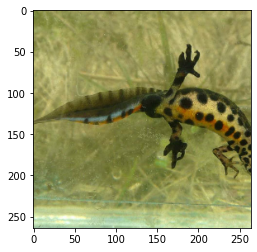

In [7]:
plt.imshow(images[0].numpy())

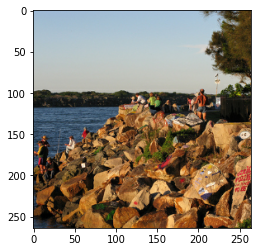

In [8]:
plt.imshow(images[3].numpy())

In [ ]:
PREVIOUS TRY

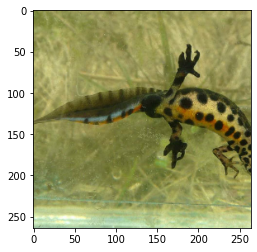

In [7]:
plt.imshow(images[0].numpy())

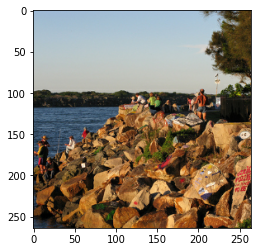

In [8]:
plt.imshow(images[3].numpy())

In [ ]:
PREVIOUS TRY

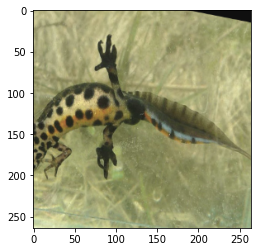

In [8]:
plt.imshow(images[0].numpy())

In [12]:
images[0].numpy().reshape([-1])[:7]

array([0.7326663 , 0.7202345 , 0.5342233 , 0.7343048 , 0.71959466,
       0.5313051 , 0.7374502 ], dtype=float32)

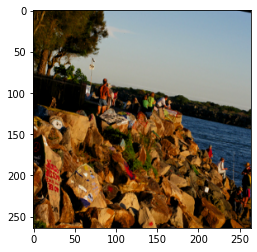

In [9]:
plt.imshow(images[3].numpy())

In [13]:
images[3].numpy().reshape([-1])[:7]

array([0.21702011, 0.16340628, 0.        , 0.22744112, 0.14803477,
       0.        , 0.20033912], dtype=float32)

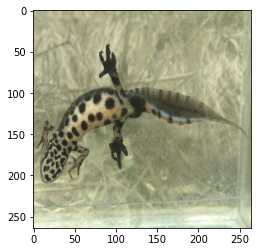

In [7]:
plt.imshow(images[0].numpy())

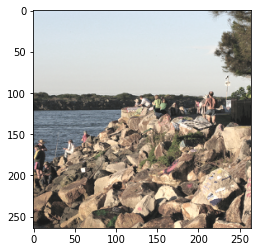

In [8]:
plt.imshow(images[3].numpy())

In [9]:
env = RetinaEnv(config)

In [10]:
env.reset(images)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:


for i in range(20):
    coordinates = np.random.randint(-2,3,(config.batch_size,2))
    env.step(coordinates)
    print(env.images_history.shape)
    print(env.retinal_view.shape)

(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)
(32, 224, 224, 16)
(32, 224, 224, 1)


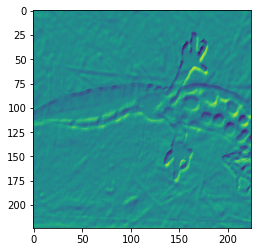

In [12]:
plt.imshow(env.retinal_view[0].numpy())

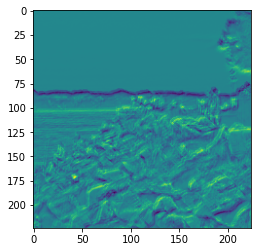

In [13]:
plt.imshow(env.retinal_view[3].numpy())

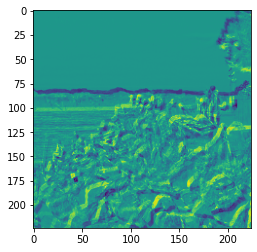

In [14]:
plt.imshow(env.images_history[3][:,:,0].numpy()-env.images_history[3][:,:,-1].numpy())

In [15]:
def spectral_power(images, convert_to_grayscale=False):
    #convert images to grayscale
    if convert_to_grayscale:
        images = rgb2gray(images)
    #squeeze singular dimensions
    images = np.squeeze(images)
    #compute fft
    fft = np.fft.fft2(images)
    #compute power spectra  
    power = np.abs(fft)**2
    #compute power spectra along horizontal axis
    power_h = np.sum(power,axis=1)
    #compute power spectra along vertical axis
    power_v = np.sum(power,axis=2)
    #sum power spectra along both directions
    power_sum = power_h + power_v
    return power_sum

#function that returns first half of power spectra
#images is a batch of images
#convert_to_grayscale is a boolean that indicates whether to convert images to grayscale
#returns a batch of 1D power spectra
def spectral_power_half(images, convert_to_grayscale=False):
    power = spectral_power(images, convert_to_grayscale)
    power_half = power[:,:power.shape[1]//2]
    return power_half

In [16]:
np.squeeze(env.images).shape

(32, 264, 264)

In [17]:
orig_spectrum = spectral_power_half(env.images)
retinal_spectrum = spectral_power_half(env.retinal_view)

In [18]:
orig_spectrum.shape

(32, 132)

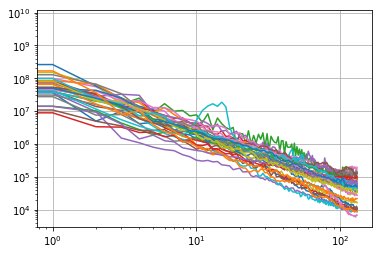

In [19]:
for spectrum in np.squeeze(orig_spectrum):
    plt.loglog(spectrum)
plt.grid()

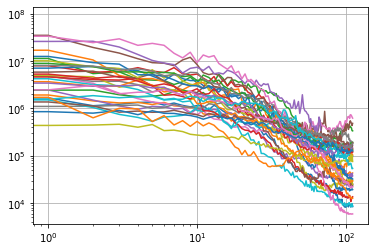

In [20]:
for spectrum in np.squeeze(retinal_spectrum):
    plt.loglog(spectrum)
plt.grid()

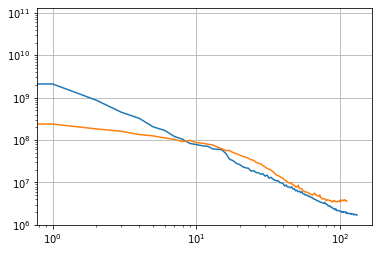

In [21]:
plt.loglog(orig_spectrum.sum(axis=0))
plt.loglog(retinal_spectrum.sum(axis=0))
plt.grid()

In [22]:
def calculate_retinal_filter(t, T1=5, T2=15, n=3, R=0.8):
    # Filter calculation
    t_filter = (t ** n / T1 ** (n + 1)) * np.exp(-t / T1) - R * (t ** n / T2 ** (n + 1)) * np.exp(-t / T2)
    t_filter = t_filter / np.max(t_filter)
    return t_filter

In [23]:
t_vec = np.linspace(0,150,16)
default_filter = calculate_retinal_filter(t_vec)

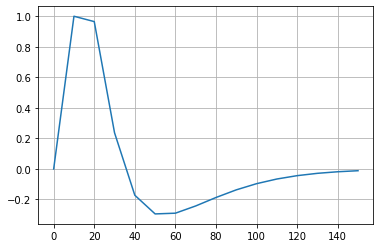

In [24]:
plt.plot(t_vec,default_filter)
plt.grid()

In [25]:
default_filter.sum(), np.abs(default_filter).sum()

(0.6137037081788854, 3.789630839210814)

In [26]:
env.filter = default_filter.reshape([1,1,-1,1])
env.config.history_length = 16

In [27]:
env.reset(images)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
# coordinates = np.zeros((config.batch_size,2)) 
# origins_offset = np.array([[config.image_hm//2,config.image_wm//2]])

for i in range(20):
    coordinates = np.random.randint(-2,3,(config.batch_size,2))
    env.step(coordinates)

In [29]:
orig_spectrum = spectral_power_half(env.images)
retinal_spectrum = spectral_power_half(env.retinal_view)

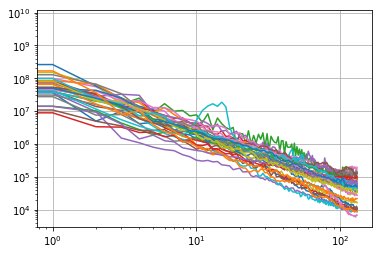

In [30]:
for spectrum in np.squeeze(orig_spectrum):
    _=plt.loglog(spectrum)
plt.grid()

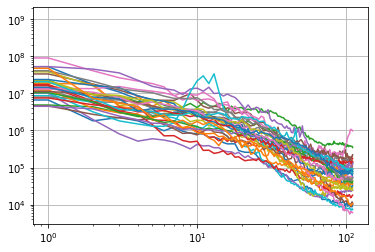

In [31]:
for spectrum in np.squeeze(retinal_spectrum):
    plt.loglog(spectrum)
plt.grid()

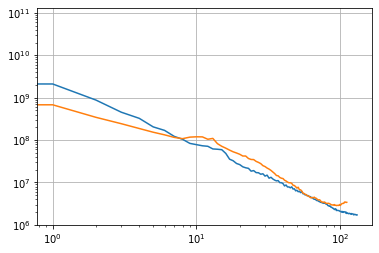

In [32]:
plt.loglog(orig_spectrum.sum(axis=0))
plt.loglog(retinal_spectrum.sum(axis=0))
plt.grid()

In [33]:
balanced_filter = calculate_retinal_filter(t_vec, R=1.0)
env.filter = balanced_filter.reshape([1,1,-1,1])


In [34]:
env.reset(images)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
# coordinates = np.zeros((config.batch_size,2)) 
# origins_offset = np.array([[config.image_hm//2,config.image_wm//2]])

for i in range(20):
    coordinates = np.random.randint(-2,3,(config.batch_size,2))
    env.step(coordinates)

In [36]:
orig_spectrum = spectral_power_half(env.images)
retinal_spectrum = spectral_power_half(env.retinal_view)

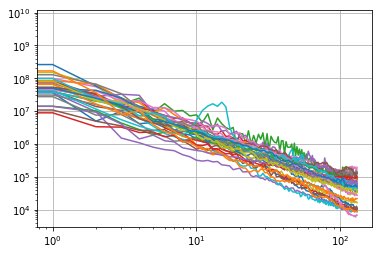

In [37]:
for spectrum in np.squeeze(orig_spectrum):
    _=plt.loglog(spectrum)
plt.grid()

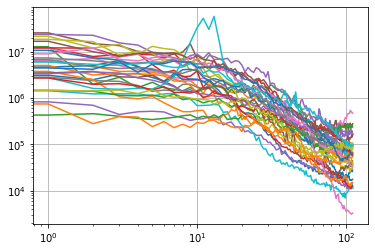

In [38]:
for spectrum in np.squeeze(retinal_spectrum):
    plt.loglog(spectrum)
plt.grid()

Text(0, 0.5, 'instantaneous spectral power [au]')

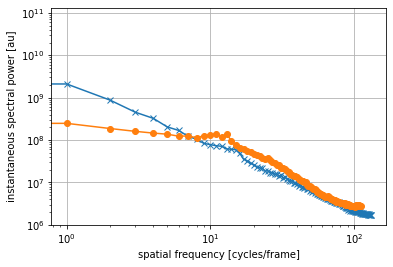

In [39]:
plt.loglog(orig_spectrum.sum(axis=0),'x-')
plt.loglog(retinal_spectrum.sum(axis=0),'o-')
plt.grid()
plt.xlabel('spatial frequency [cycles/frame]')
plt.ylabel('instantaneous spectral power [au]')

/tmp/ipykernel_4178453/1739326699.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[15,8])


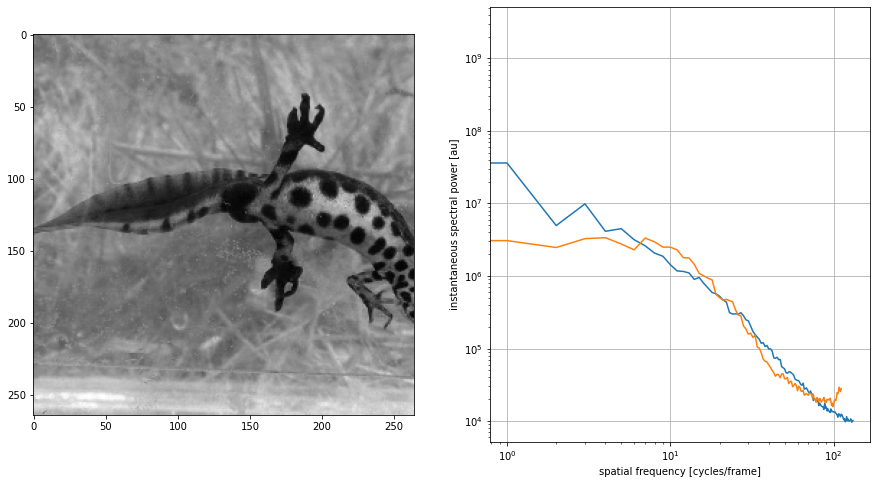

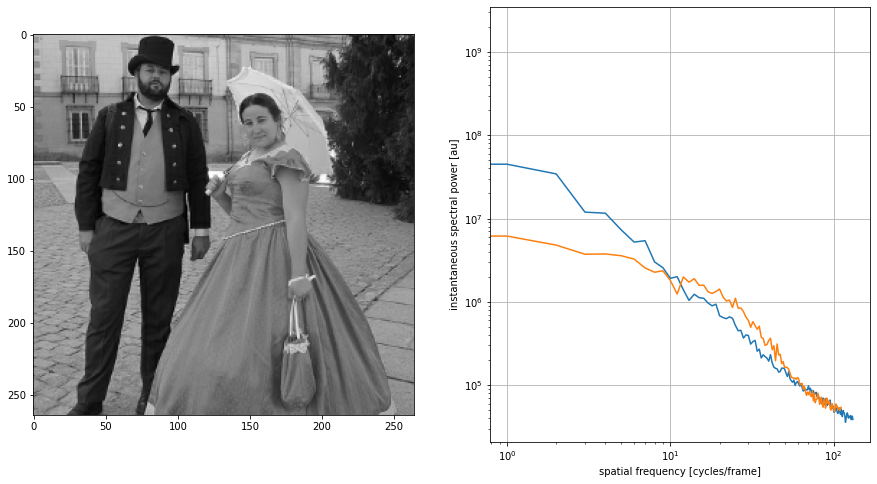

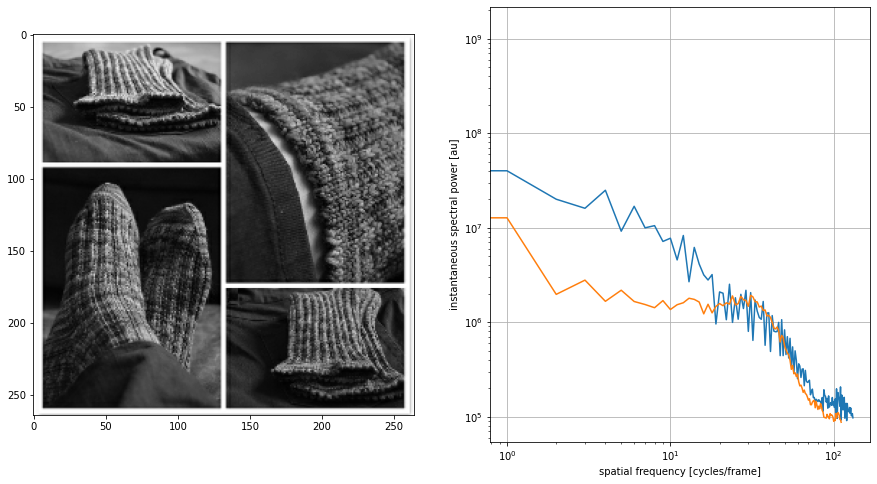

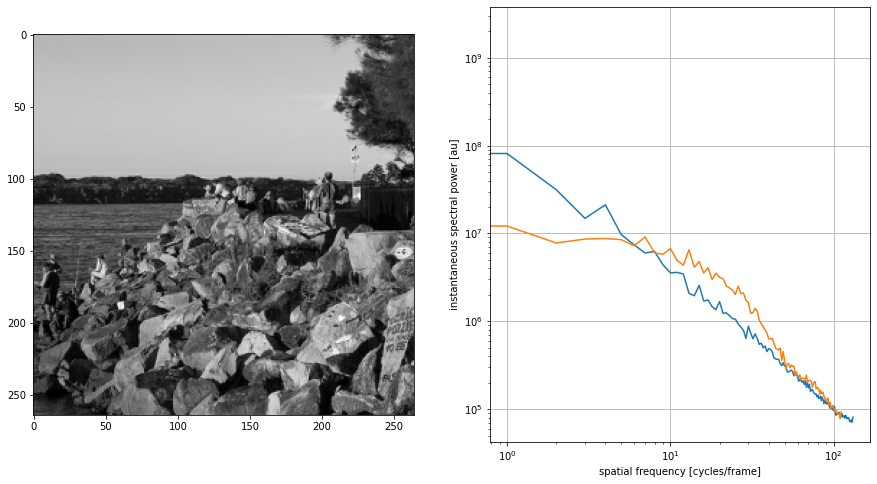

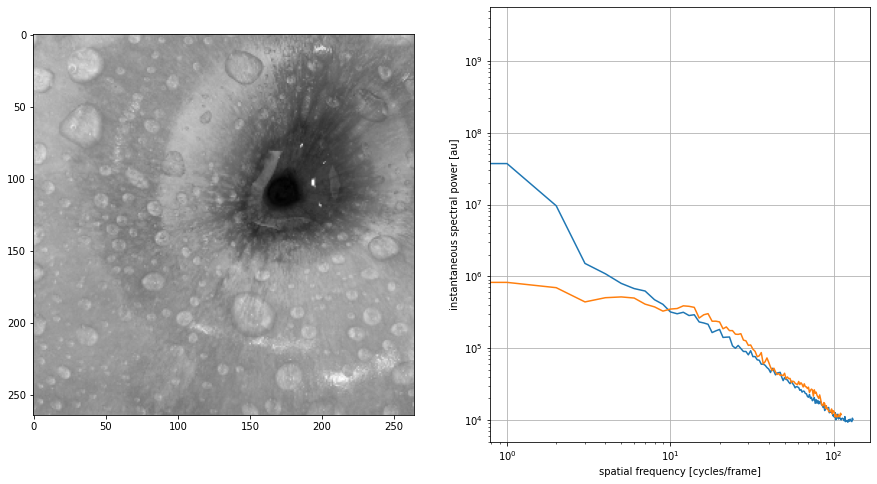

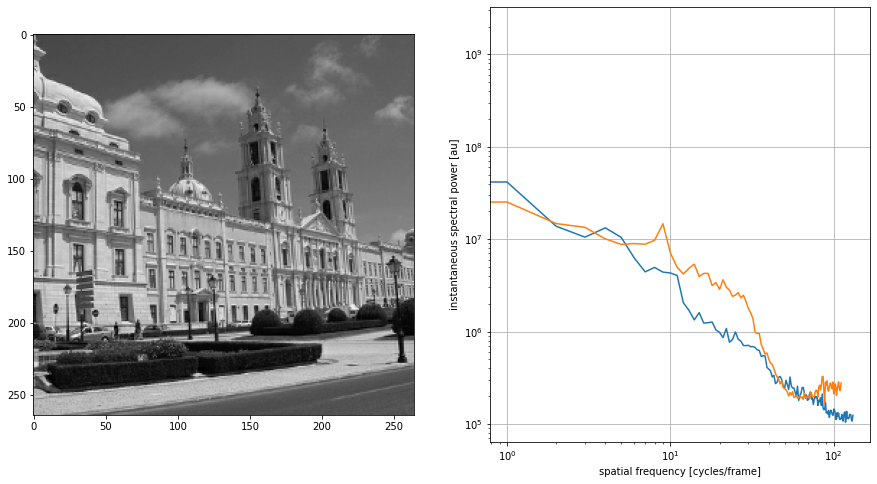

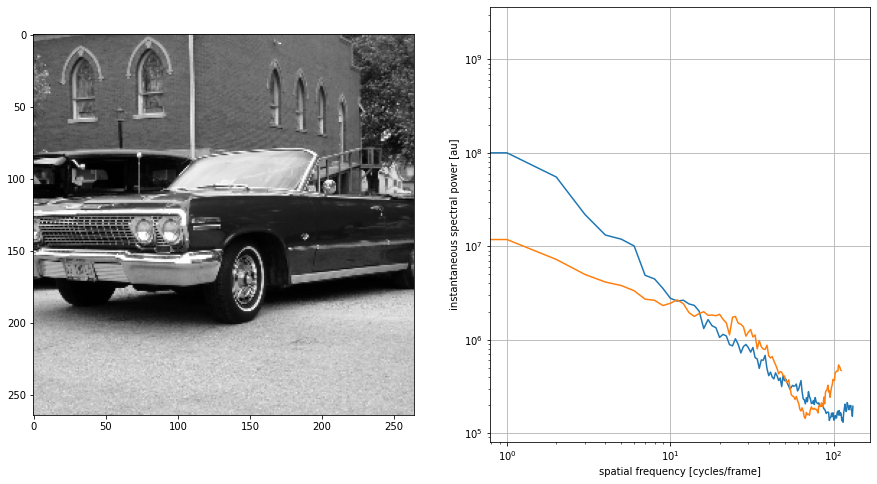

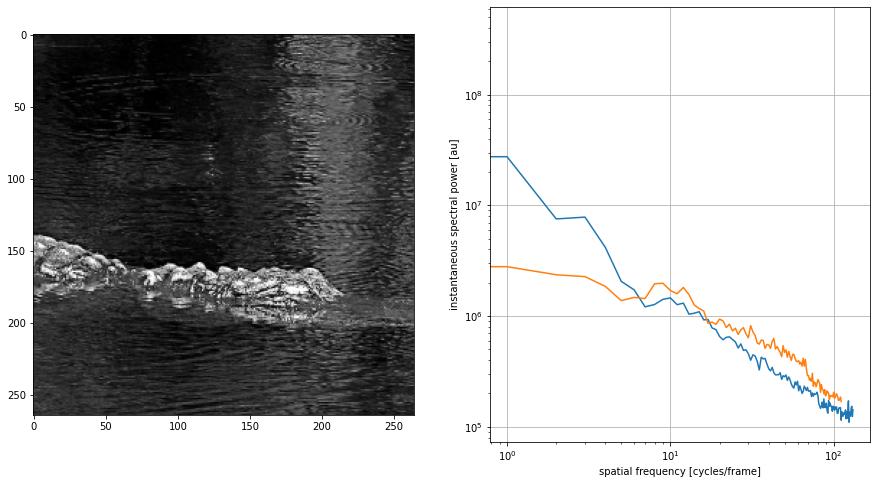

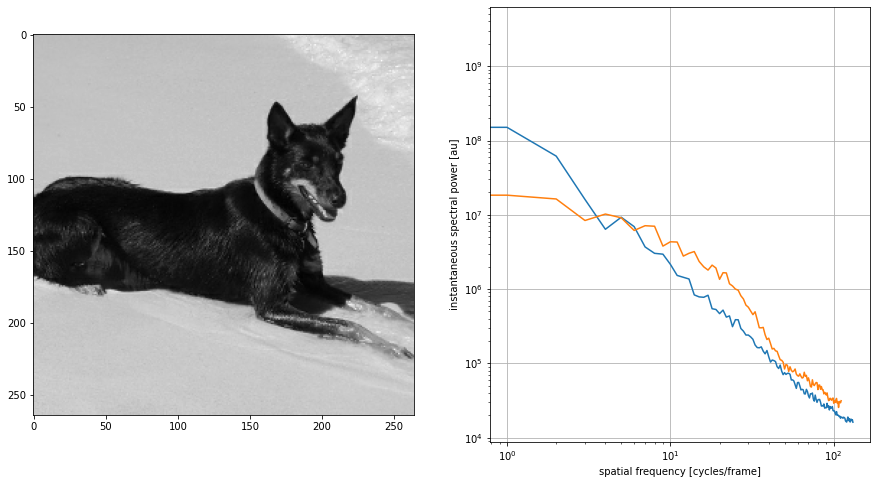

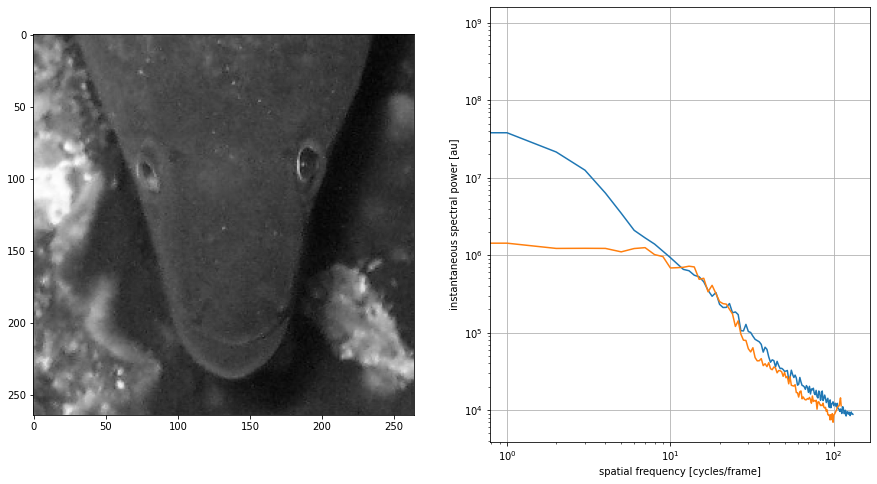

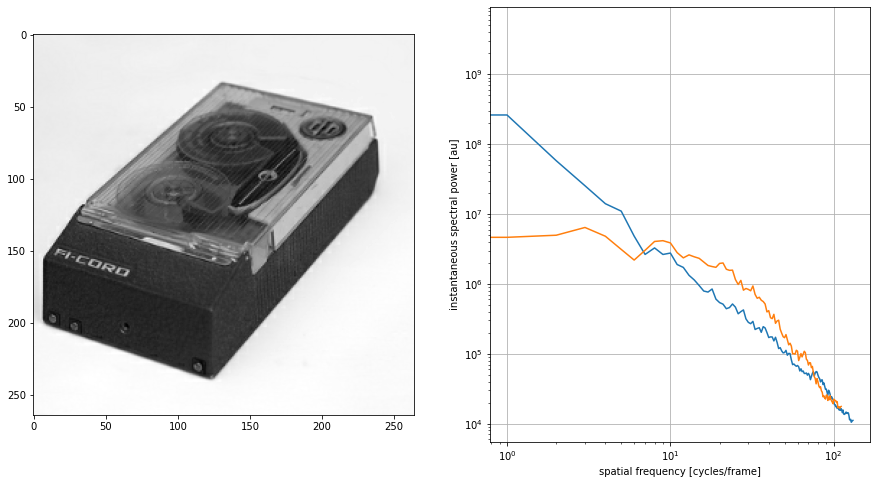

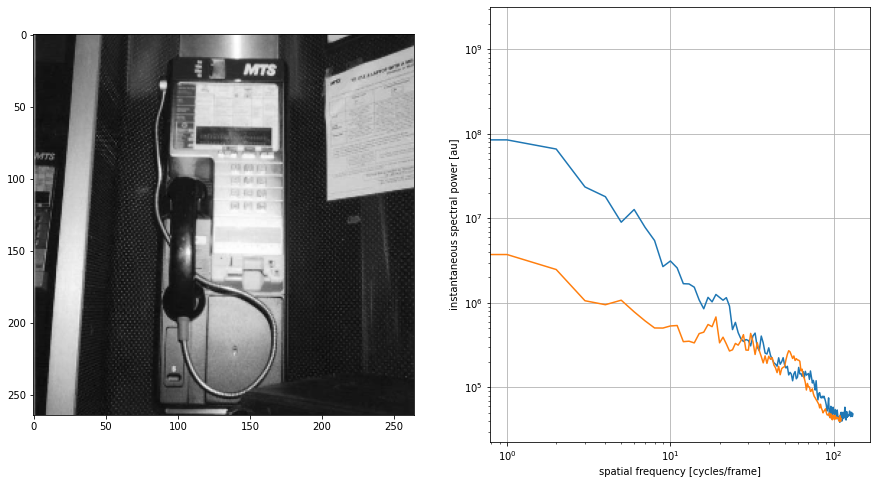

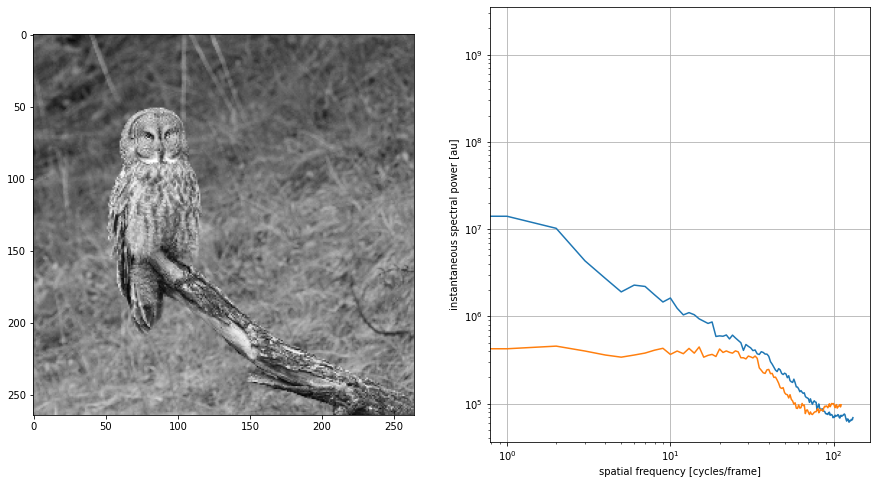

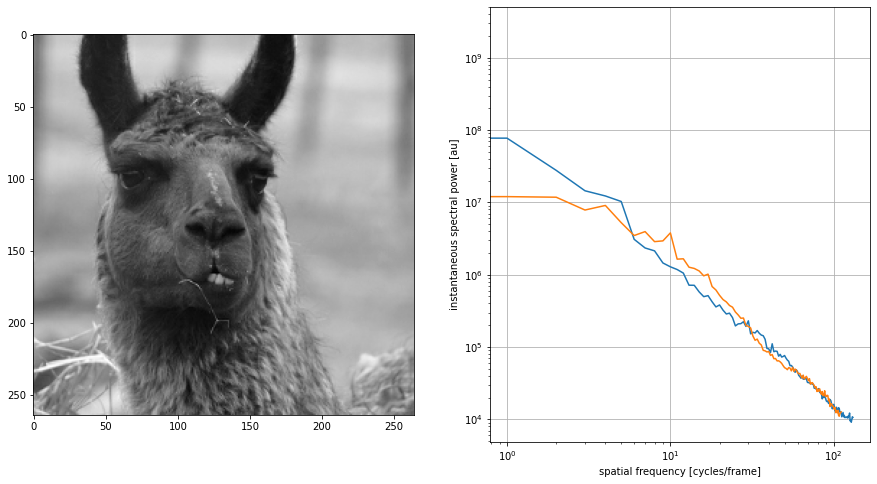

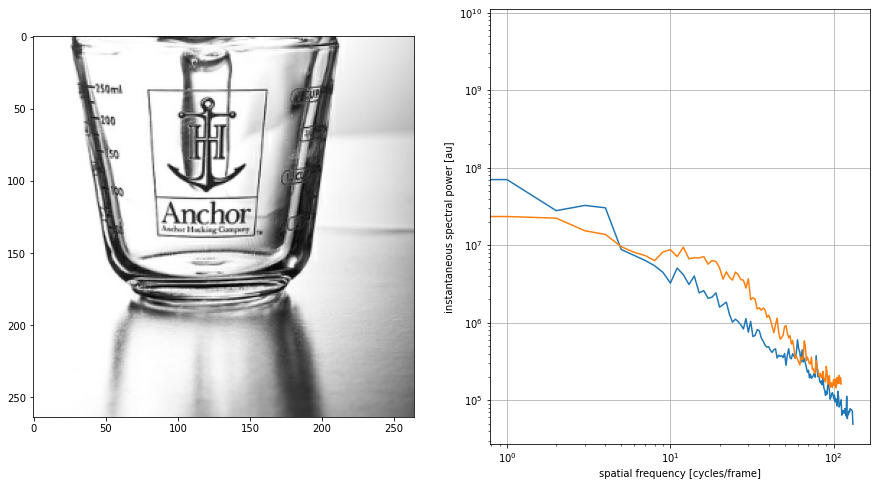

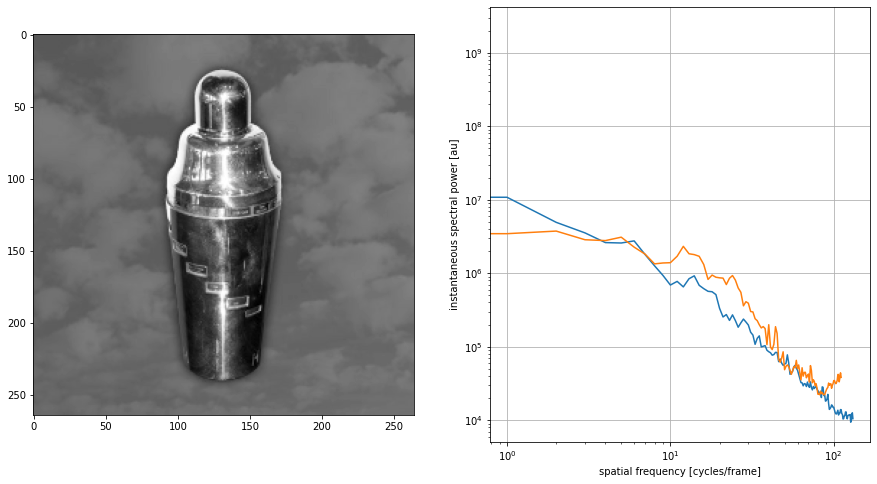

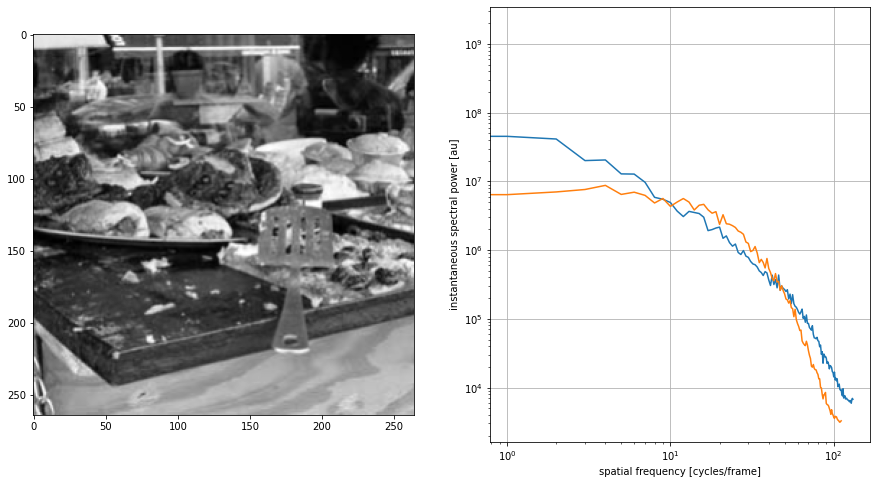

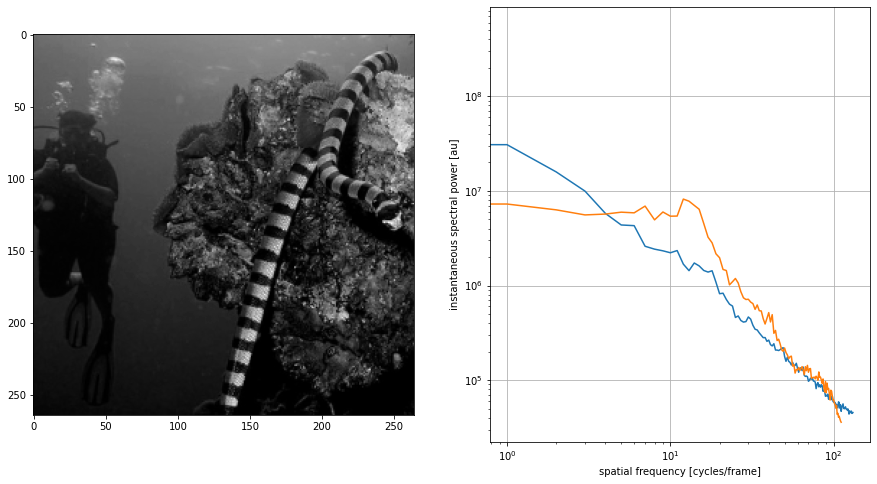

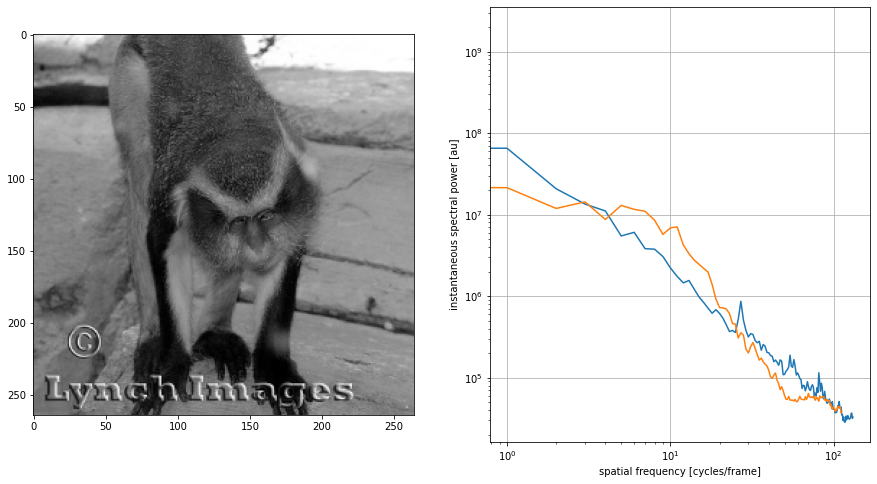

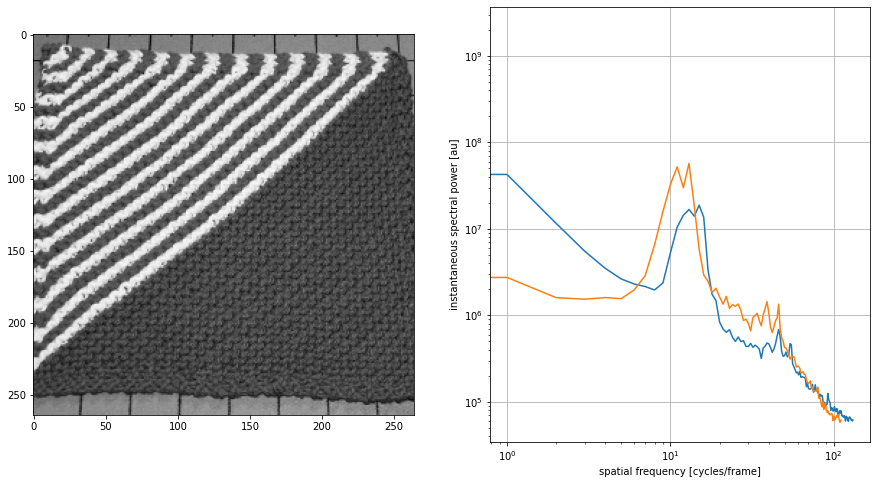

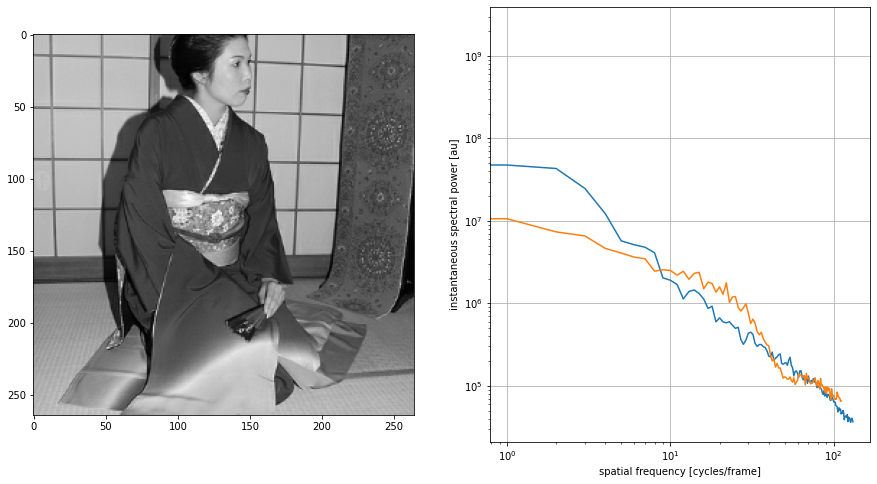

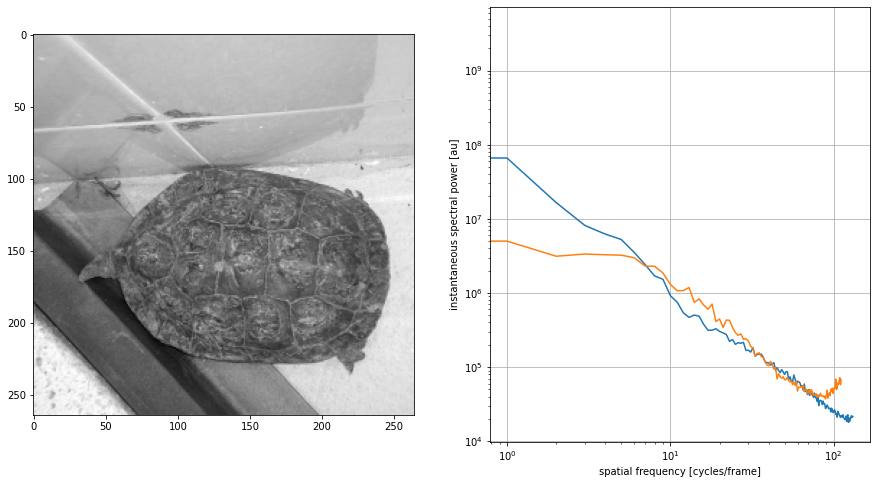

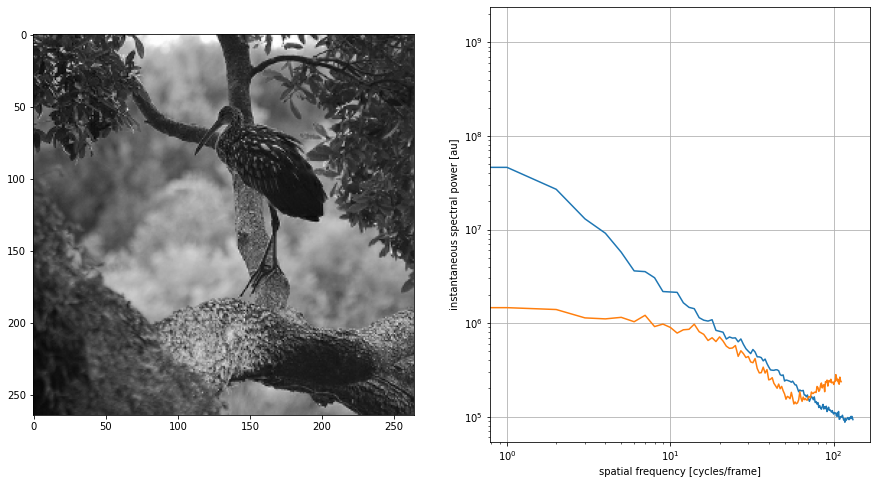

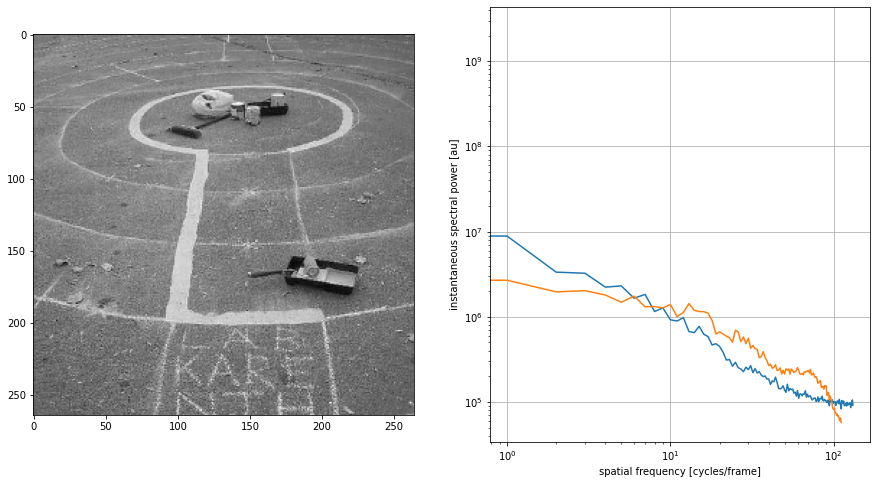

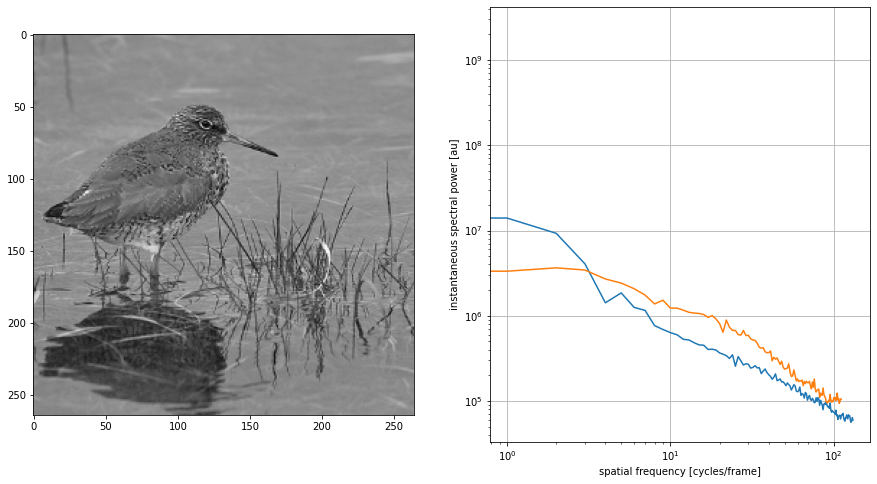

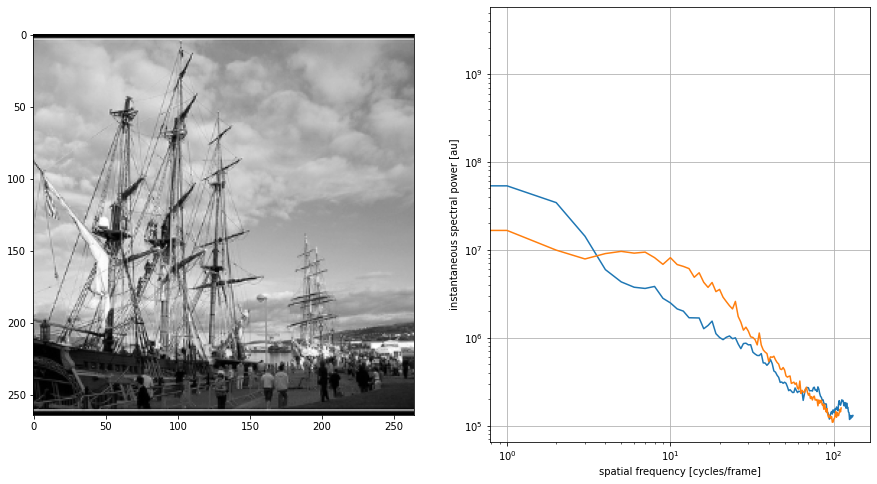

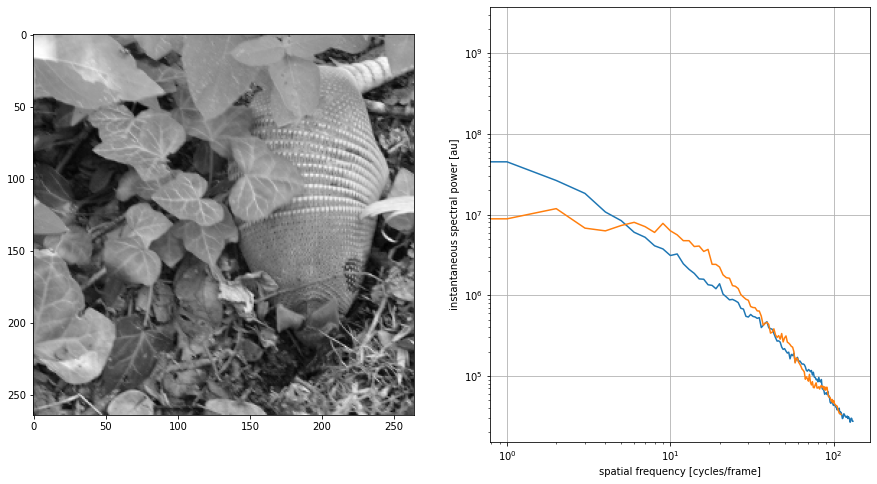

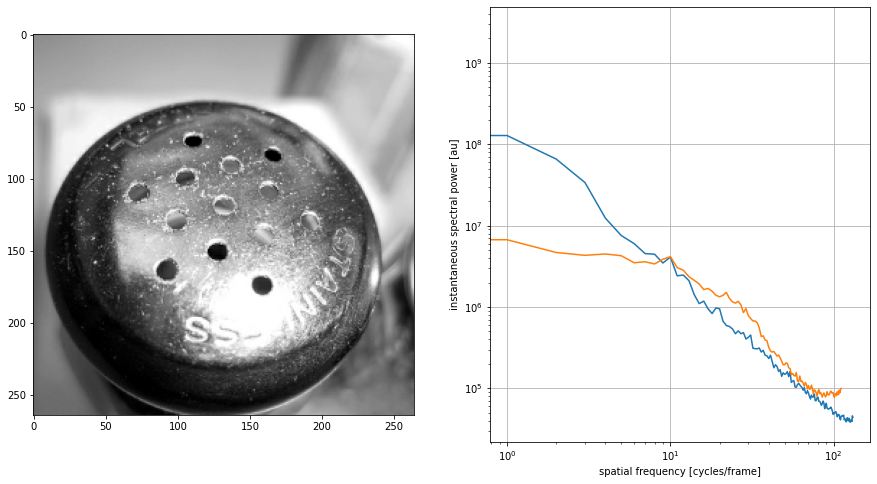

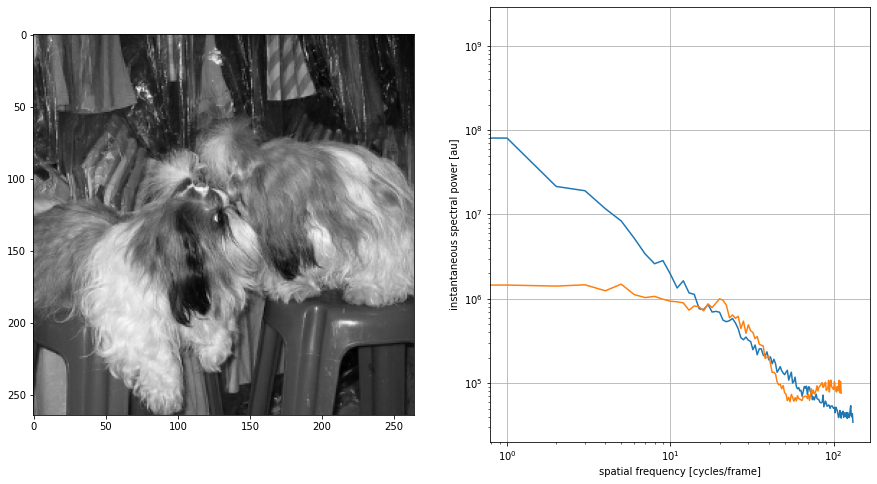

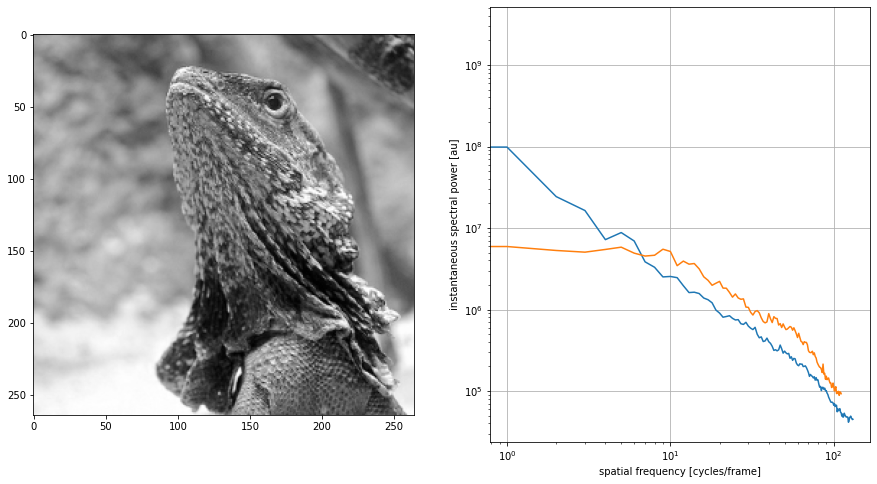

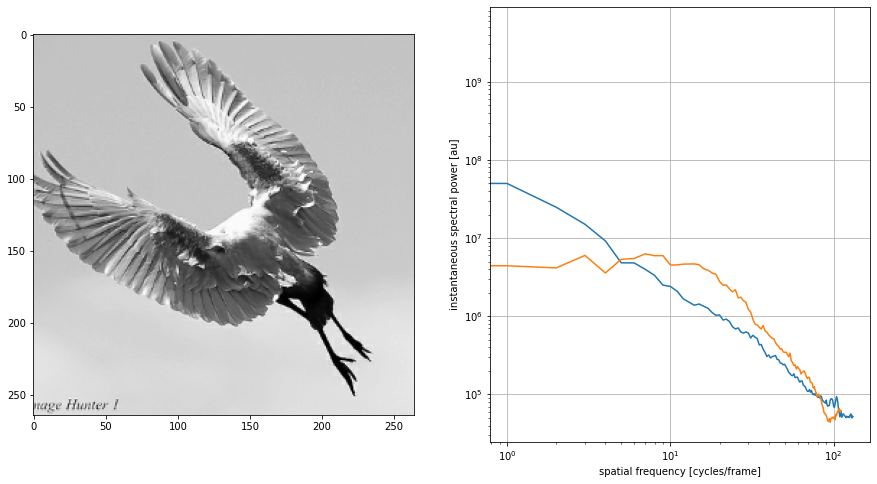

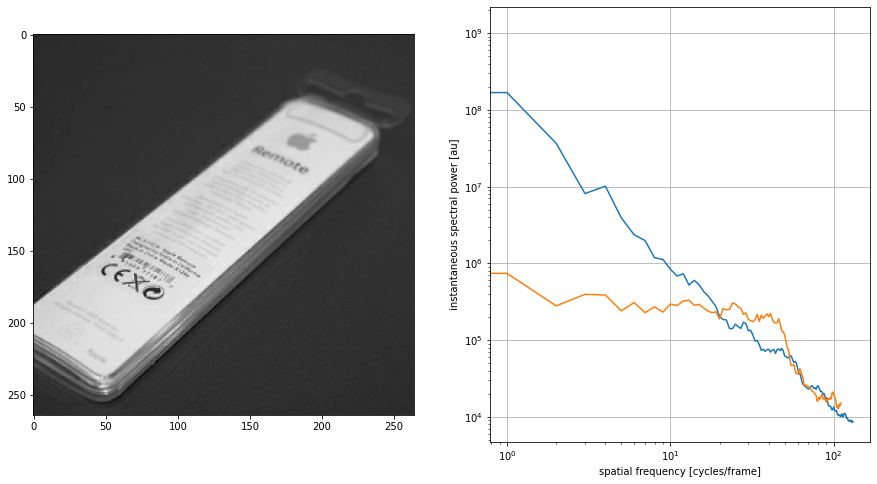

In [40]:
for i in range(config.batch_size):
    plt.figure(figsize=[15,8])
    plt.subplot(1,2,1)
    plt.imshow(env.images[i],cmap='gray')
    plt.subplot(1,2,2)
    _=plt.loglog(orig_spectrum[i])
    _=plt.loglog(retinal_spectrum[i])
    plt.grid()
    plt.xlabel('spatial frequency [cycles/frame]')
    plt.ylabel('instantaneous spectral power [au]')

# REDUCING THE AMPLITUDE BY A FACTOR OF TWO

In [41]:
this_game_name = 'amp1'

coordinates = np.zeros((config.batch_size,2)) 
origins_offset = np.array([[config.image_hm//2,config.image_wm//2]])

for i in range(20):
    coordinates += np.random.randint(-1,2,(config.batch_size,2))
    env.step(origins_offset+coordinates)

orig_spectrum[this_game_name] = spectral_power_half(env.images)
retinal_spectrum[this_game_name] = spectral_power_half(env.retinal_view)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
plt.loglog(orig_spectrum[this_game_name].sum(axis=0),'x-')
plt.loglog(retinal_spectrum[this_game_name].sum(axis=0),'o-')
plt.grid()
plt.xlabel('spatial frequency [cycles/frame]')
plt.ylabel('instantaneous spectral power [au]')

# IMPOSING GAUSSIAN MOTION

In [ ]:
this_game_name = 'gaussian'
coordinates = np.zeros((config.batch_size,2)) 
origins_offset = np.array([[config.image_hm//2,config.image_wm//2]])

for i in range(20):
    coordinates += np.random.normal(size=(config.batch_size,2))
    env.step(np.round(origins_offset+coordinates))

orig_spectrum[this_game_name] = spectral_power_half(env.images)
retinal_spectrum[this_game_name] = spectral_power_half(env.retinal_view)

In [ ]:
plt.loglog(orig_spectrum[this_game_name].sum(axis=0),'x-')
plt.loglog(retinal_spectrum[this_game_name].sum(axis=0),'o-')
plt.grid()
plt.xlabel('spatial frequency [cycles/frame]')
plt.ylabel('instantaneous spectral power [au]')

In [ ]:
this_game_name = 'gaussian_x1p5'
coordinates = np.zeros((config.batch_size,2)) 
origins_offset = np.array([[config.image_hm//2,config.image_wm//2]])

for i in range(20):
    coordinates += 1.5*np.random.normal(size=(config.batch_size,2))
    env.step(np.round(origins_offset+coordinates))

orig_spectrum[this_game_name] = spectral_power_half(env.images)
retinal_spectrum[this_game_name] = spectral_power_half(env.retinal_view)

In [ ]:
plt.loglog(orig_spectrum[this_game_name].sum(axis=0),'x-')
plt.loglog(retinal_spectrum[this_game_name].sum(axis=0),'o-')
plt.grid()
plt.xlabel('spatial frequency [cycles/frame]')
plt.ylabel('instantaneous spectral power [au]')

In [ ]:
orig_spectrum = {}
retinal_spectrum = {}

In [ ]:
plt.loglog(orig_spectrum[this_game_name].sum(axis=0),'x-')
legend = ['original']
for this_game_name in retinal_spectrum:
    _=plt.loglog(retinal_spectrum[this_game_name].sum(axis=0),'o-')
    plt.grid()
    plt.xlabel('spatial frequency [cycles/frame]')
    plt.ylabel('instantaneous spectral power [au]')
    legend.append(this_game_name)
plt.legend(legend)